In [1]:
import h5py
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [2]:
def get_frf(data_array, chn_, imp_, n_sampl):
    h1_name = f'MT_FRF_H1_{chn_}+_{imp_}+'
    coh_name = f'MT_Coherence_{chn_}+_{imp_}+'
    h1, coh = [], []
    for i in range(n_sampl):
        h1.append(np.array(data_array[h1_name + f'_Real_{i}']) + np.array(data_array[h1_name + f'_Imag_{i}'])*1.j)
        #coh.append(np.array(data_array[coh_name + f'_{i}']))
    return h1#, coh

In [3]:
def get_chn_imp_dict(keys_):
    real_keys = list(set([k_[:-2] for k_ in keys_  if ('Coherence' not in k_) and ('Real' in k_)]))
    imag_keys = list(set([k_[:-2] for k_ in keys_  if ('Coherence' not in k_) and ('Imag' in k_)]))
    channels = [k_.split('_')[3].replace('+', '') for k_ in real_keys]
    impacts = [k_.split('_')[4].replace('+', '') for k_ in imag_keys]
    no_chn = max(set([int(_[:-1]) for _ in channels]))*3
    no_imp = max(set([int(_[:-1]) for _ in impacts]))
    dir_dict = {0:'X', 1:'Y', 2:'Z'}
    chn_dict = {i:f'{i//3 + 1}{dir_dict[i%3]}' for i in range(no_chn)}
    imp_dict = {i:f'{i + 1}Z' for i in range(no_chn)}
    return chn_dict, imp_dict

In [ ]:
filename = r"C:\Users\timvr\OneDrive - Univerza v Ljubljani\Documents\Doktorat\Projekt_2\karakterizacija_kovic\Meritve\Meritve_6\ARB_12Nm\ARB_12Nm.h5"
with h5py.File(filename, 'r') as f:
    key = list(f.keys())[0]
    data_array = f[key]
    keys_ = list(data_array.keys())
    chn_dict, imp_dict = get_chn_imp_dict(keys_)
    n_sampl = 3
    Y = np.zeros((n_sampl, 10000, len(chn_dict), len(imp_dict)), dtype=complex)
    Y_out = np.zeros((10000, len(chn_dict), len(imp_dict)), dtype=complex)
    for row_ in tqdm(range(len(chn_dict))):
        for col_ in tqdm(range(len(imp_dict)), leave=False):
            Y_ = get_frf(data_array, chn_dict[row_], imp_dict[col_], n_sampl)
            for i in range(2):
                Y[i, :, row_, col_] = Y_[i]
            Y_out[:,row_, col_] = Y[0, :, row_, col_]

In [273]:
[_ for _ in keys_ if ('_1X' in _) and ('_1Z' in _)]

['MT_FRF_H1_1X+_1Z+_Imag_0',
 'MT_FRF_H1_1X+_1Z+_Imag_1',
 'MT_FRF_H1_1X+_1Z+_Imag_2',
 'MT_FRF_H1_1X+_1Z+_Real_0',
 'MT_FRF_H1_1X+_1Z+_Real_1',
 'MT_FRF_H1_1X+_1Z+_Real_2']

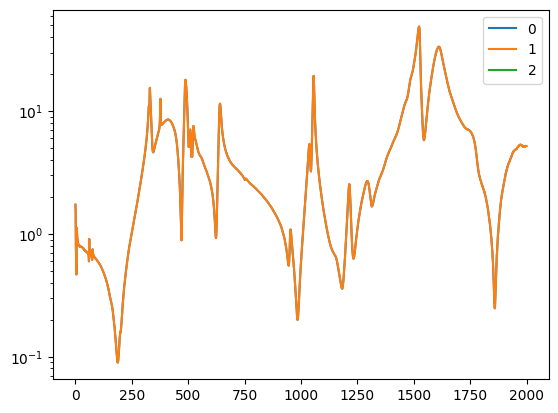

In [274]:
for i in range(n_sampl):
    plt.semilogy(np.abs(Y[i,:2000, 0, 1]), label=i)
plt.legend()

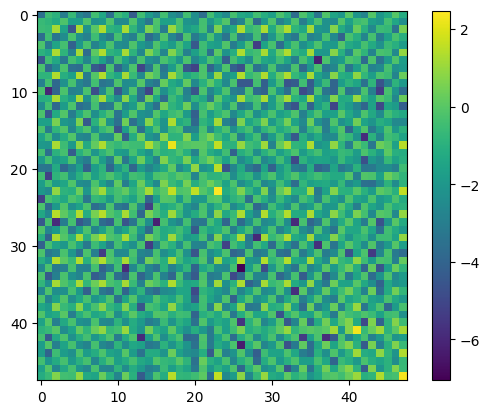

In [275]:
plt.imshow(np.log(np.abs(Y_out[100,:,:])))
plt.colorbar()

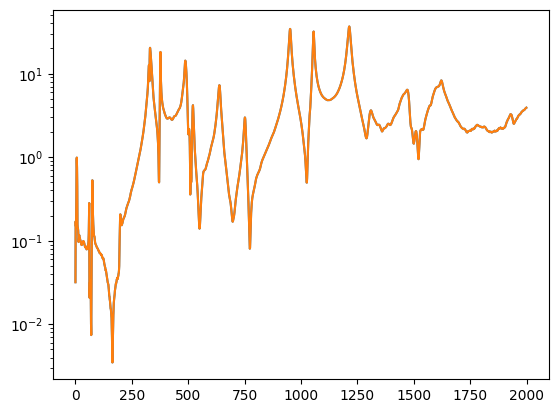

In [276]:
for i in range(2):
    plt.semilogy(np.abs(Y[i, :2000, 9, 20]))

In [277]:
#np.save('Y_12Nm', Y_out)

In [59]:
""" Y_6_old = np.load('Y_6Nm_alt_old.npy') """

In [61]:
""" import pyFBS """

C:\Users\timvr\AppData\Roaming\Python\Python311\site-packages\altair\utils\schemapi.py:353: DeprecationWarning: jsonschema.RefResolver is deprecated as of v4.18.0, in favor of the https://github.com/python-jsonschema/referencing library, which provides more compliant referencing behavior as well as more flexible APIs for customization. A future release will remove RefResolver. Please file a feature request (on referencing) if you are missing an API for the kind of customization you need.
  resolver = jsonschema.RefResolver.from_schema(root or schema)


In [142]:
Y_6 = np.load('Y_6Nm_alt.npy')

In [123]:
Y_8 = np.load('Y_8Nm_alt.npy')
Y_8_ = np.zeros_like(Y_8, dtype=complex)
Y_8_[:,:24,:] = Y_8[:,24:,:].copy()
Y_8_[:,24:,:] = Y_8[:,:24,:].copy()

In [231]:
Y_8_5 = np.load('Y_8_5Nm_alt.npy')

In [188]:
Y_9 = np.load('Y_9Nm_alt.npy')
Y_9_ = np.zeros_like(Y_9, dtype=complex)
Y_9_[:,:24,:] = Y_9[:,24:,:].copy()
Y_9_[:,24:,:] = Y_9[:,:24,:].copy()

In [234]:
Y_9_5 = np.load('Y_9_5Nm_alt.npy')
Y_9_5_ = np.zeros_like(Y_9_5, dtype=complex)
Y_9_5_[:,:24,:] = Y_9_5[:,24:,:].copy()
Y_9_5_[:,24:,:] = Y_9_5[:,:24,:].copy()

In [148]:
Y_10 = np.load('Y_10Nm_alt.npy')
Y_10_ = np.zeros_like(Y_10, dtype=complex)
Y_10_[:,:24,:] = Y_10[:,24:,:].copy()
Y_10_[:,24:,:] = Y_10[:,:24,:].copy()

In [159]:
Y_12 = np.load('Y_12Nm_alt.npy')

Text(0.5, 1.0, '8-12; mean: 0.920')

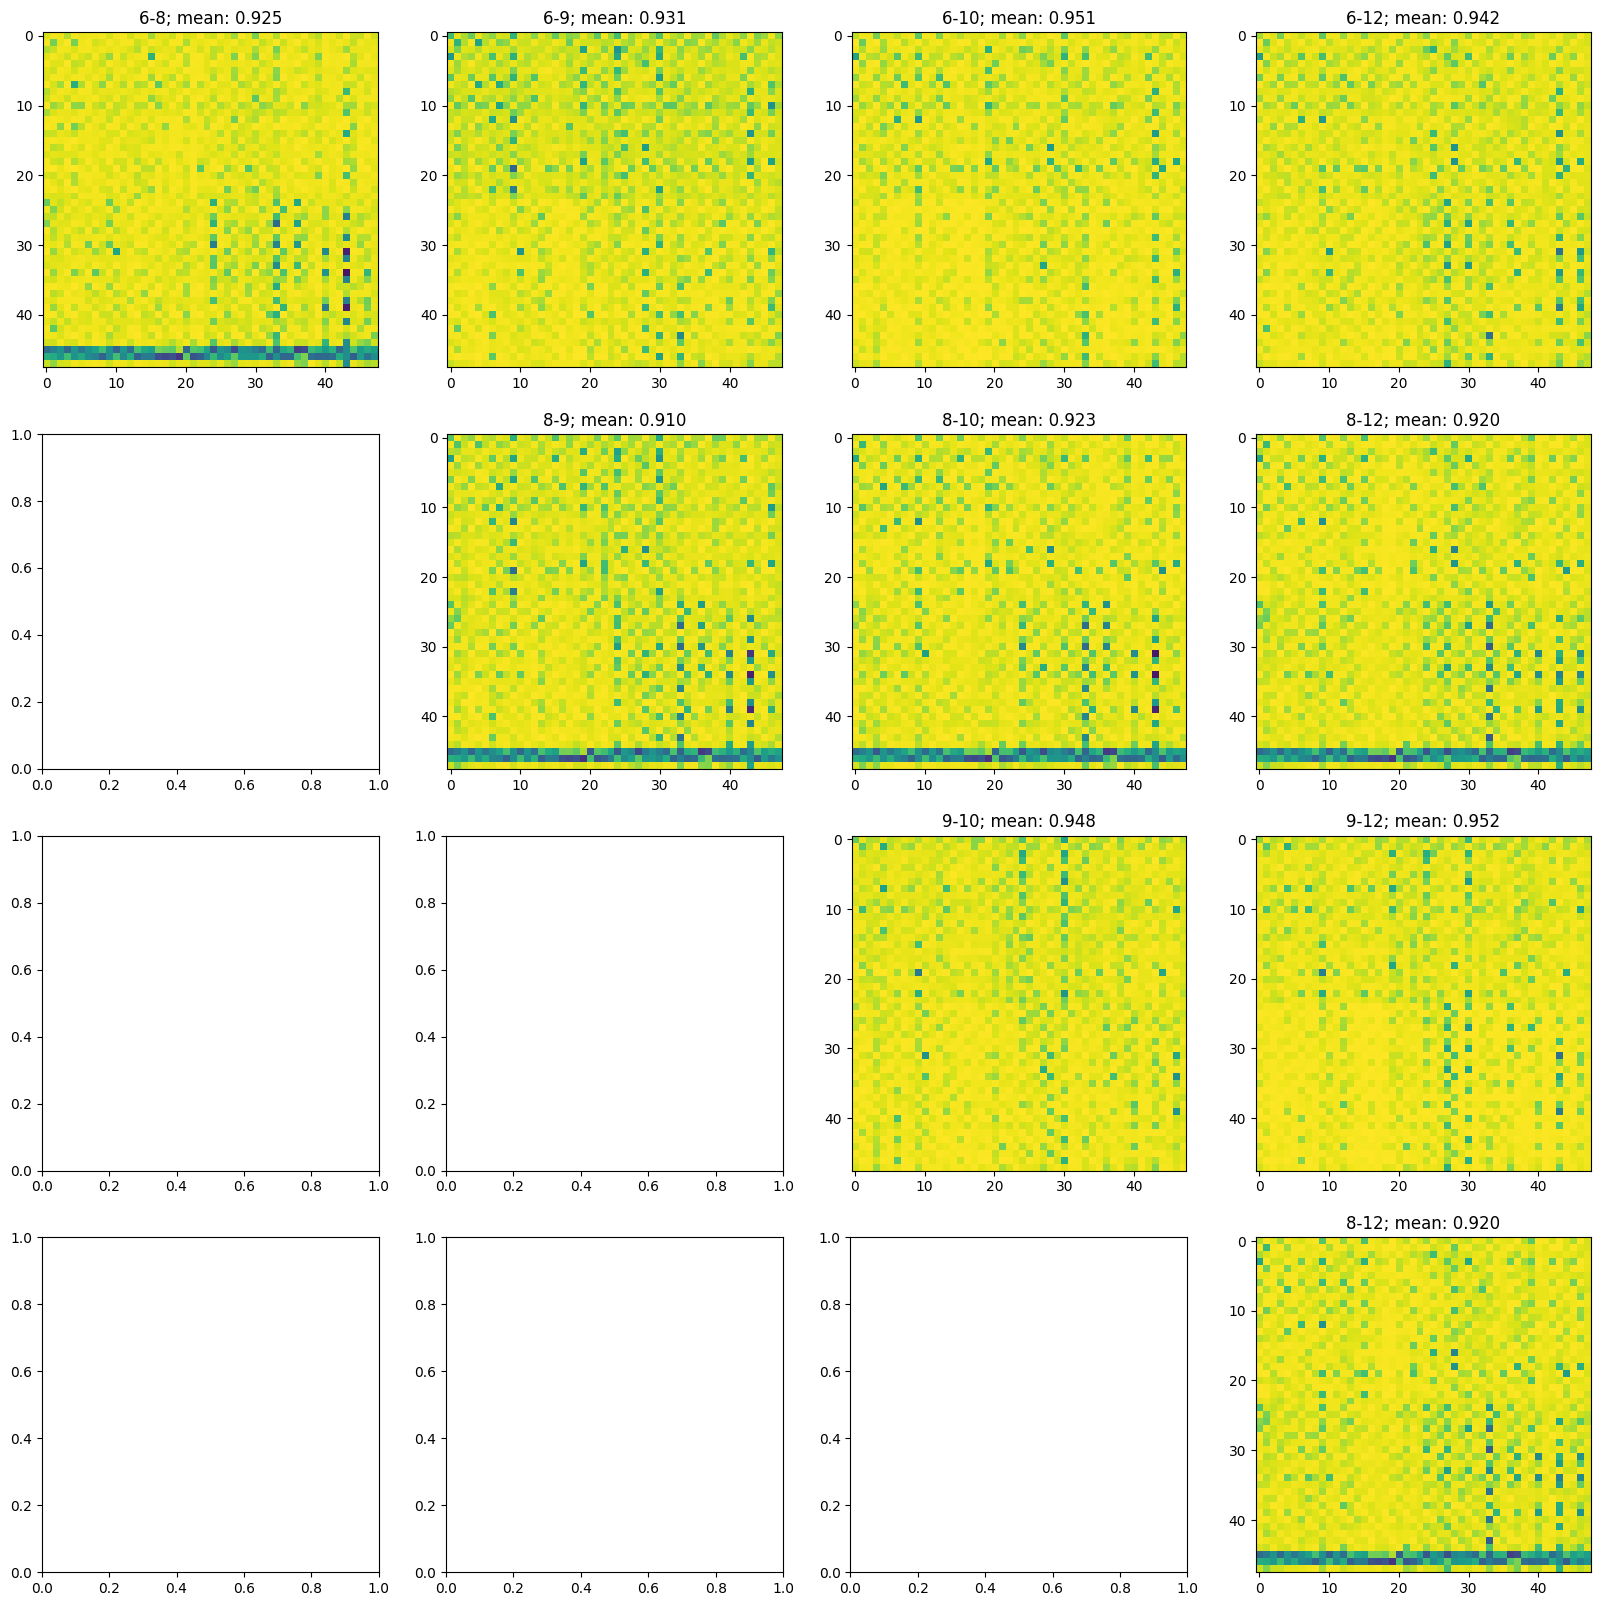

In [190]:
fr_lim=500
fig, ax = plt.subplots(4,4, figsize=(20, 20))
# 6 Nm
# 6-8
coh_6_8 = pyFBS.coh_frf(Y_6, Y_8_, return_average=False)
ax[0,0].imshow(coh_6_8[:fr_lim].mean(axis=0), vmin=0, vmax=1)
ax[0,0].set_title(f'6-8; mean: {coh_6_8[:fr_lim].mean():.3f}')
# 6-9
coh_6_9 = pyFBS.coh_frf(Y_6, Y_9_, return_average=False)
ax[0,1].imshow(coh_6_9[:fr_lim].mean(axis=0), vmin=0, vmax=1)
ax[0,1].set_title(f'6-9; mean: {coh_6_9[:fr_lim].mean():.3f}')
# 6-10
coh_6_10 = pyFBS.coh_frf(Y_6, Y_10_, return_average=False)
ax[0,2].imshow(coh_6_10[:fr_lim].mean(axis=0), vmin=0, vmax=1)
ax[0,2].set_title(f'6-10; mean: {coh_6_10[:fr_lim].mean():.3f}')
# 6-12
coh_6_12 = pyFBS.coh_frf(Y_6, Y_12, return_average=False)
ax[0,3].imshow(coh_6_12[:fr_lim].mean(axis=0), vmin=0, vmax=1)
ax[0,3].set_title(f'6-12; mean: {coh_6_12[:fr_lim].mean():.3f}')
# 8 Nm
# 8- 9
coh_8_9 = pyFBS.coh_frf(Y_8_, Y_9_, return_average=False)
ax[1,1].imshow(coh_8_9[:fr_lim].mean(axis=0), vmin=0, vmax=1)
ax[1,1].set_title(f'8-9; mean: {coh_8_9[:fr_lim].mean():.3f}')
# 8- 10
coh_8_10 = pyFBS.coh_frf(Y_8_, Y_10_, return_average=False)
ax[1,2].imshow(coh_8_10[:fr_lim].mean(axis=0), vmin=0, vmax=1)
ax[1,2].set_title(f'8-10; mean: {coh_8_10[:fr_lim].mean():.3f}')
# 8-12
coh_8_12 = pyFBS.coh_frf(Y_8_, Y_12, return_average=False)
ax[1,3].imshow(coh_8_12[:fr_lim].mean(axis=0), vmin=0, vmax=1)
ax[1,3].set_title(f'8-12; mean: {coh_8_12[:fr_lim].mean():.3f}')
# 9 Nm
# 9- 10
coh_9_10 = pyFBS.coh_frf(Y_9_, Y_10_, return_average=False)
ax[2,2].imshow(coh_9_10[:fr_lim].mean(axis=0), vmin=0, vmax=1)
ax[2,2].set_title(f'9-10; mean: {coh_9_10[:fr_lim].mean():.3f}')
# 9-12
coh_9_12 = pyFBS.coh_frf(Y_9_, Y_12, return_average=False)
ax[2,3].imshow(coh_9_12[:fr_lim].mean(axis=0), vmin=0, vmax=1)
ax[2,3].set_title(f'9-12; mean: {coh_9_12[:fr_lim].mean():.3f}')
# 10 Nm
# 10-12
coh_8_12 = pyFBS.coh_frf(Y_8_, Y_12, return_average=False)
ax[3,3].imshow(coh_8_12[:fr_lim].mean(axis=0), vmin=0, vmax=1)
ax[3,3].set_title(f'8-12; mean: {coh_8_12[:fr_lim].mean():.3f}')


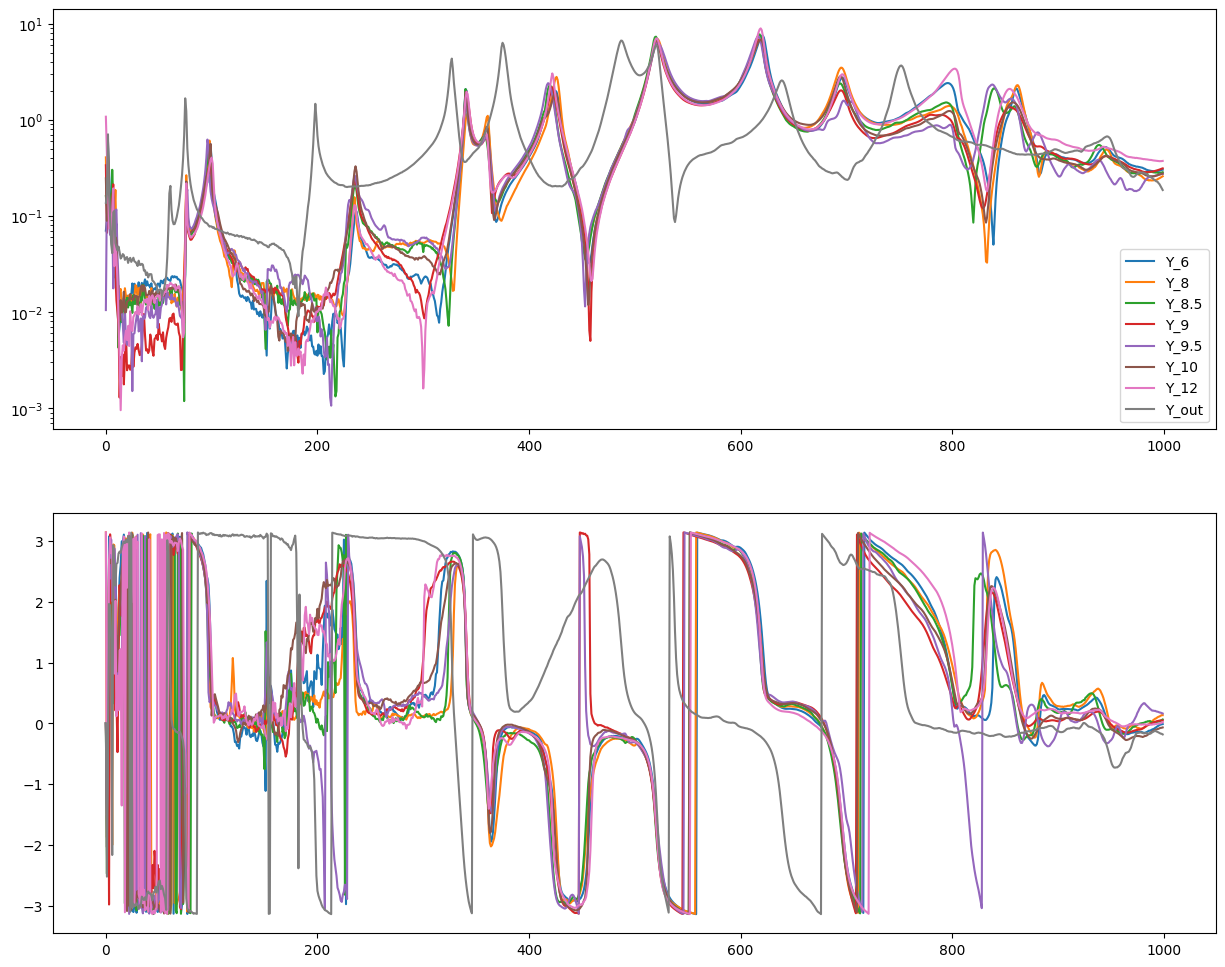

In [261]:
i,j = 28, 7
#plt.semilogy(np.abs(Y_6_old[:3000, i, j]))
fig, ax = plt.subplots(2,1, figsize=(15,12))
for label, Y_ in zip('Y_6, Y_8, Y_8.5, Y_9, Y_9.5, Y_10, Y_12'.split(', '), [Y_6, Y_8_, Y_8_5, Y_9_, Y_9_5_, Y_10_, Y_12]):
    ax[0].semilogy(np.abs(Y_[:1000, i, j]), label=label)
    ax[1].plot(np.angle(Y_[:1000, i, j]))
ax[0].legend()

In [278]:
Y_8 = np.load('Y_8Nm.npy')
Y_9_5 = np.load('Y_9_5Nm.npy')
Y_9_5_ = np.zeros_like(Y_9_5, dtype=complex)
Y_9_5_[:,:24,:] = Y_9_5[:,24:,:].copy()
Y_9_5_[:,24:,:] = Y_9_5[:,:24,:].copy()
Y_12 = np.load('Y_12Nm.npy')

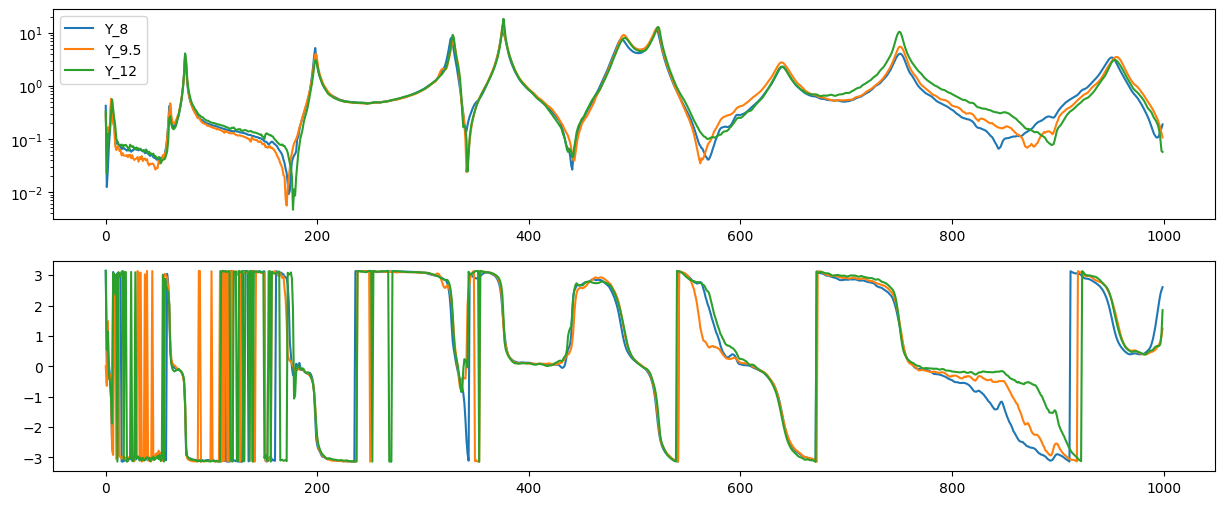

In [280]:
i,j = 28, 8
#plt.semilogy(np.abs(Y_6_old[:3000, i, j]))
fig, ax = plt.subplots(2,1, figsize=(15,6))
for label, Y_ in zip('Y_8, Y_9.5, Y_12'.split(', '), [Y_8, Y_9_5_, Y_12]):
    ax[0].semilogy(np.abs(Y_[:1000, i, j]), label=label)
    ax[1].plot(np.angle(Y_[:1000, i, j]))
ax[0].legend()